In [25]:
# If we compare 3 sorts (insertion, merge, and hybrid-merge), the k value that optimizes speed will be the same as the k value where merge sort became faster than insertion.

In [2]:
# I will approach this problem similarly to question 1. I will use my insertion and merge sort algorithms from question 1. Using these algorithms, I will write a hybrid merge sort which will take 2 parameters, an array of data and a threshold value (k). If the length of the array is ever less than or equal to k, then insertion sort will be called. Otherwise, merge sort will be performed to reduce the input size. Next, similarly to question 1, I will record the time it takes to sort an array of size n and then place that time to another array which will be used for plotting. I will do this for insertion, merge, and hybrid sort. Finally, using matplotlib, I will plot the data, and test different k values to see what threshold will allow for hybrid sort to be faster than merge and insertion sort.

In [17]:
# Code taken from lecture slides and geeks for geeks: https://www.geeksforgeeks.org/insertion-sort/#
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j = j - 1
        arr[j+1] = key

In [18]:
# Code taken and modified from geeks for geeks: https://www.geeksforgeeks.org/merge-sort/
def mergeSort(arr):
        length = len(arr)
        mid = length // 2
        if length < 2:
            return
        lower = arr[0:mid]
        upper = arr[mid:length]
        mergeSort(lower)
        mergeSort(upper)
        i = j = 0
        while i + j < length:
            if j == len(upper) or (i < len(lower) and lower[i] < upper[j]):
                arr[i+j] = lower[i]
                i = i+1
            else:
                arr[i+j] = upper[j]
                j = j+1

In [19]:
def hybridSort(arr, threshold):
    if len(arr) <= threshold:
        insertionSort(arr)
    else:
        length = len(arr)
        mid = length // 2
        if length < 2:
            return
        lower = arr[0:mid]
        upper = arr[mid:length]
        hybridSort(lower, threshold)
        hybridSort(upper, threshold)
        i = j = 0
        while i + j < length:
            if j == len(upper) or (i < len(lower) and lower[i] < upper[j]):
                arr[i+j] = lower[i]
                i = i+1
            else:
                arr[i+j] = upper[j]
                j = j+1

In [14]:
import timeit
hybrid_times = []
insertion_times = []
merge_times = []
for i in range(1, 301):
    arr = []
    for j in range(i, 0, -1):
        arr.append(j)
    insertion_time = timeit.timeit(lambda: insertionSort(arr.copy()), number= 100)
    merge_time = timeit.timeit(lambda: mergeSort(arr.copy()), number= 100)
    hybrid_time = timeit.timeit(lambda: hybridSort(arr.copy(), threshold= 10), number=100)
    insertion_times.append(insertion_time/100)
    merge_times.append(merge_time/100)
    hybrid_times.append(hybrid_time/100)

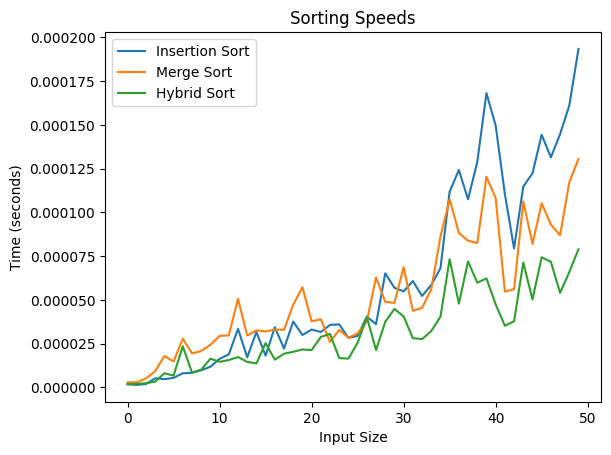

In [15]:
import matplotlib.pyplot as plt
plt.plot(insertion_times, label= "Insertion Sort")
plt.plot(merge_times, label= "Merge Sort")
plt.plot(hybrid_times, label= "Hybrid Sort")
plt.legend()
plt.title("Sorting Speeds")
plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.show()

In [23]:
# Although it is very slight, hybrid sort is faster than merge sort around n = 150 and at a k = 10 value. After testing different k values, it appears a range of k up to 15 will optimize speed. This surprised me because it is far different from my hypothesis, but it also made sense when seeing how fast insertion sort was for small inputs in question 1. Shrinking our input enough for insertion sort to take care of the sorting allowed the hybrid sort to be fast.    

In [24]:
# Based on the data gathered, a k value of 10 will optimize speed. This value is not the same as the point where merge sort becomes faster than insertion sort.